In [2]:
import math
from random import randint

In [2]:
def calc_distance(pos1, pos2):
    return round(math.sqrt((pos1[0] - pos2[0]) ** 2 + (pos1[1] - pos2[1]) ** 2), 3)


In [3]:
def egoistic_assignment(arr): 

    a_1 = calc_distance((arr[0],arr[1]),(arr[4],arr[5]))
    b_1 = calc_distance((arr[2],arr[3]),(arr[4],arr[5]))

    return 0 if a_1 < b_1 else 1

def calc_minimal_way(arr): 

    a_1 = calc_distance((arr[0],arr[1]),(arr[4],arr[5]))
    b_1 = calc_distance((arr[2],arr[3]),(arr[4],arr[5]))

    a_2 = calc_distance((arr[0],arr[1]),(arr[6],arr[7]))
    b_2 = calc_distance((arr[2],arr[3]),(arr[6],arr[7]))

    return 0 if (a_1 + b_2) < (a_2 + b_1) else 1

def calc_minimal_way_use_case_1(arr): 

    a = calc_distance((arr[0],arr[1]),(arr[4],arr[5]))
    b = calc_distance((arr[2],arr[3]),(arr[4],arr[5]))

    return 0 if a < b else 1

def calc_way_with_assignment(arr, assign): 
    if assign == 0: 
        a_1 = calc_distance((arr[0],arr[1]),(arr[4],arr[5]))
        b_2 = calc_distance((arr[2],arr[3]),(arr[6],arr[7]))
        return a_1 + b_2 
    else: 
        a_2 = calc_distance((arr[0],arr[1]),(arr[6],arr[7]))
        b_1 = calc_distance((arr[2],arr[3]),(arr[4],arr[5]))
        return a_2 + b_1

In [3]:
[round((1/7)*randint(0,7),3) for _ in range(8)]

[0.143, 1.0, 0.714, 0.429, 0.571, 0.143, 0.571, 0.143]

In [5]:
from tqdm import tqdm
import sklearn.datasets
import torch
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

n_samples = 1000000

X = np.array([[round((1/7)*randint(0,7),3) for _ in range(8)] for _ in range(n_samples)])
y = np.array([calc_minimal_way(state) for state in X])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = torch.from_numpy(X_train).type(torch.FloatTensor)
y_train = torch.from_numpy(y_train).type(torch.LongTensor)

X_test = torch.from_numpy(X_test).type(torch.FloatTensor)
y_test = torch.from_numpy(y_test).type(torch.LongTensor)

import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.fc1 = nn.Linear(8,16)
        self.fc2 = nn.Linear(16,16)
        self.fc3 = nn.Linear(16,2)
        
    def forward(self,x):
        x = self.fc1(x)
        x = torch.relu(x)
        x = self.fc2(x)
        x = torch.relu(x)
        x = self.fc3(x)
        return x
        
    def predict(self,x):
        pred = F.softmax(self.forward(x))
        ans = []
        for t in pred:
            if t[0]>t[1]:
                ans.append(0)
            else:
                ans.append(1)
        return torch.tensor(ans)
        
model = Net()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

epochs = 10
losses = []

for i in tqdm(range(epochs)):
    y_pred = model.forward(X_train)
    loss = criterion(y_pred,y_train)
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
from sklearn.metrics import accuracy_score
print(accuracy_score(model.predict(X_test),y_test))

  0%|          | 0/10 [00:00<?, ?it/s]/home/niko/Info/rlenv/lib/python3.8/site-packages/torch/autograd/__init__.py:130: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  Variable._execution_engine.run_backward(
100%|██████████| 10/10 [00:03<00:00,  2.77it/s]
<ipython-input-5-75f7d5856e89>:40: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred = F.softmax(self.forward(x))
0.48226


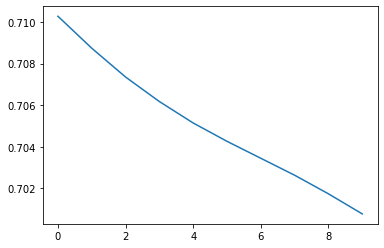

In [6]:
plt.plot(losses)

In [7]:
optimal = 0
rand = 0
egoistic = 0

for state in X: 
    optimal += calc_way_with_assignment(state, calc_minimal_way(state))
    rand += calc_way_with_assignment(state, randint(0,1))
    egoistic += calc_way_with_assignment(state, egoistic_assignment(state))

print(f'Optimal: {optimal}')
print(f'Random: {rand}')
print(f'Egoistic: {egoistic}')

print(f'Ratio: {round(optimal/rand,3)}')

Optimal: 998811.9340005482
Random: 1181438.7430004831
Egoistic: 1053665.0370005157
Ratio: 0.845


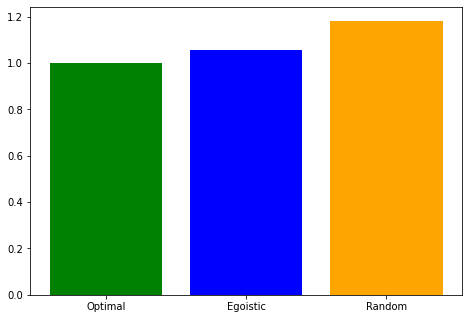

In [18]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(6,4))
ax = fig.add_axes([0,0,1,1])
modes = ['Optimal', 'Egoistic', 'Random']
results = [optimal/optimal,egoistic/optimal,rand/optimal]
colors=['green', 'blue', 'orange']
ax.bar(modes,results,color=colors)

plt.show()